In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier



In [2]:
data=pd.read_excel("D:/packages.xlsx")

In [3]:
data.head() 


janruary  february  march  april  may  june  july  augest  septemper  \
0         0       505    212    245   15   174   182     274        282   
1       219       182    188     76   52   103   152      35        169   
2       234       174    300      0  448   258   301       0        532   
3       201       172    194    194  240   269   225     308        278   
4       221       267    269    289  256   282   247     308        228   

   october  november  kind  solar  
0        0     539.0     0    2.0  
1      111     231.0     0    1.0  
2      261     230.0     0    2.0  
3      283     235.0     0    2.0  
4      211     176.0     0    2.0

In [4]:
data.isnull().sum()



janruary     0
february     0
march        0
april        0
may          0
june         0
july         0
augest       0
septemper    0
october      0
november     1
kind         0
solar        1
dtype: int64

In [5]:
data.fillna(method='ffill',inplace=True)

In [6]:
X = data.drop(['solar'], axis=1)


y = data['solar']

In [7]:
X

janruary  february  march  april  may  june  july  augest  septemper  \
0            0       505    212    245   15   174   182     274        282   
1          219       182    188     76   52   103   152      35        169   
2          234       174    300      0  448   258   301       0        532   
3          201       172    194    194  240   269   225     308        278   
4          221       267    269    289  256   282   247     308        228   
...        ...       ...    ...    ...  ...   ...   ...     ...        ...   
2023       430       342    374    359  260   291   298     242        231   
2024       151       144    142    160  150   193   198     351        705   
2025       101        83     76     72   80    75   122     177        265   
2026        50        58     36     37   37    43    56      70         89   
2027       182       178    196    204  151   193   220     251        361   

      october  november  kind  
0           0     539.0     0  
1         111     231.0     0  
2         261     230.0     0  
3         283     235.0     0  
4         211     176.0     0  
...       ...       ...   ...  
2023      232     196.0     1  
2024      713     467.0     1  
2025      275     157.0     1  
2026       71      95.0     1  
2027      637     373.0     1  

[2028 rows x 12 columns]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
cols=X_train.columns

In [10]:
y_train = y_train.astype(int)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear', max_iter=1000)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [14]:
y_pred  = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

cm

array([[281,   0,   0,   0],
       [ 28, 145,   0,   0],
       [  0,  32,   0,   4],
       [  0,   0,   1,  16]], dtype=int64)

<Axes: >

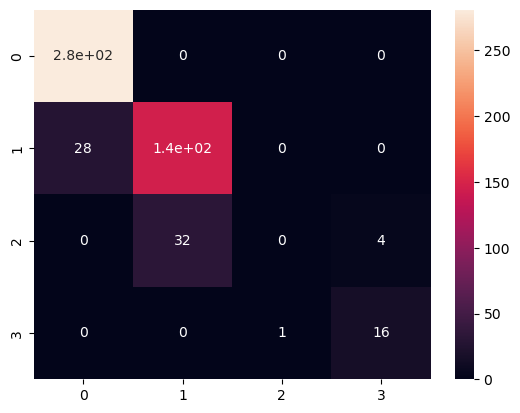

In [16]:
import seaborn as sns 
sns.heatmap(pd.DataFrame(cm),annot=True)

In [17]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test, y_pred)
accuracy

0.8717948717948718

In [18]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))






              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       281
         2.0       0.82      0.84      0.83       173
         3.0       0.00      0.00      0.00        36
         4.0       0.80      0.94      0.86        17

    accuracy                           0.87       507
   macro avg       0.63      0.69      0.66       507
weighted avg       0.81      0.87      0.84       507



In [19]:
x_tryy = [[0,505,212,245,15,174,182,274,282,0,539.0,0],[219,182,188,76,52,103,152,35,169,111,231.0,0]]

In [20]:
x_try_scaled = scaler.transform(x_tryy)

C:\Users\menna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:

predicted_class = model.predict(x_try_scaled)



C:\Users\menna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
for i, predicted_class in enumerate(predicted_class):
    print(f"The predicted class for sample {i+1} is: {predicted_class}")

The predicted class for sample 1 is: 2
The predicted class for sample 2 is: 1


In [41]:
### create a pickle file using serialization 
import pickle 
pickle_out=open("model1.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [24]:
#m=data['solar'].unique()



In [25]:
y_train_shifted = y_train - 1


In [36]:
#XG_model=XGBClassifier()

In [37]:
#XG_model.fit(X_train,y_train_shifted)

In [38]:
#XG_pred=model.predict(X_test)

In [39]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,XG_pred)

#cm

In [40]:
#accuracyY =accuracy_score(y_test, XG_pred)
#accuracyY

In [34]:
''''
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification models
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine Classifier': SVC(),
    'XGBoost Classifier': xgb.XGBClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=0)
}

# Define preprocessing pipeline
preprocessor = StandardScaler()

# Create pipelines for each model
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in model_dict.items()}

# Train and evaluate each model
accuracy_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_results[name] = accuracy

# Sort and print results
accuracy_results_sorted = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))
print(accuracy_results_sorted)
'''''



"'\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import accuracy_score, f1_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nimport xgboost as xgb\nfrom catboost import CatBoostClassifier\n\n# Generate sample data\nX, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)\nx_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define classification models\nmodel_dict = {\n    'Logistic Regression': LogisticRegression(),\n    'Decision Tree Classifier': DecisionTreeClassifier(),\n    'Random Forest Classifier': RandomForestClassifier(),\n    'Support Vector Machine Classifier': SVC(),\n

In [33]:
'''''
keys=(accuracy_results_sorted.keys())
values=(accuracy_results_sorted.values())
plt.figure(figsize=(10, 6))
plt.bar(keys,values)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.show()
'''''

"''\nkeys=(accuracy_results_sorted.keys())\nvalues=(accuracy_results_sorted.values())\nplt.figure(figsize=(10, 6))\nplt.bar(keys,values)\nplt.tight_layout()\nplt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability\n\n\nplt.show()\n"